In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
data = pd.read_csv("data.csv")  

In [3]:
data.head(10)

datetime     open     high      low    close        volume       reserve  \
0  2020-07-16  9190.80  9216.02  9005.00  9130.11   8765.698589  2.889262e+06   
1  2020-07-17  9130.93  9182.99  9054.99  9154.29   6423.747162  2.889943e+06   
2  2020-07-18  9154.29  9210.00  9122.65  9175.85   4121.626974  2.890642e+06   
3  2020-07-19  9175.83  9245.03  9105.37  9212.87   3520.072476  2.892067e+06   
4  2020-07-20  9214.01  9223.51  9131.00  9161.05   5815.330842  2.891858e+06   
5  2020-07-21  9161.05  9438.00  9157.04  9394.14   9603.915113  2.886594e+06   
6  2020-07-22  9394.14  9567.77  9277.00  9536.18  10362.352648  2.900148e+06   
7  2020-07-23  9536.20  9686.00  9450.04  9613.24  12992.971919  2.899728e+06   
8  2020-07-24  9613.24  9645.55  9475.70  9551.21   9798.893466  2.902496e+06   
9  2020-07-25  9551.21  9747.76  9536.64  9711.33   6973.110894  2.904662e+06   

   funding_rates      mvrv          nrpl      nupl  stock_to_flow_reversion  \
0       0.009332  1.563972 -3.694023e+06  0.360602                 0.421011   
1       0.007262  1.568555  3.367513e+05  0.362471                 0.366354   
2       0.004125  1.572507  7.637219e+06  0.364073                 0.404649   
3       0.007809  1.579355  2.053120e+07  0.366830                 0.409607   
4       0.010244  1.568483  7.103351e+06  0.362441                 0.437860   
5       0.006989  1.607883  3.230461e+07  0.378064                 0.398037   
6       0.007788  1.632192  5.920877e+07  0.387327                 0.465718   
7       0.011243  1.642599  8.216394e+07  0.391209                 0.442979   
8       0.008258  1.632343  5.445417e+07  0.387384                 0.521388   
9       0.010736  1.658076  5.036880e+07  0.396891                 0.467317   

   sth_sopr signal        RSI        9_ema       21_ema       50_ema  \
0  0.997131   none  47.108800  9214.535081  9196.119258  9524.945856   
1  0.999726   none  48.843088  9202.486065  9206.292278  9560.413230   
2  1.000724    buy  50.404638  9197.158852  9216.465298  9595.880603   
3  1.000859   none  53.054470  9200.301081  9226.638318  9631.347977   
4  1.000647   none  49.099864  9192.450865  9236.811338  9666.815351   
5  1.009928   none  62.602869  9232.788692  9246.984357  9702.282724   
6  1.006242   none  68.148087  9293.466954  9257.157377  9737.750098   
7  1.013736   none  70.687516  9357.421563  9267.330397  9773.217471   
8  1.010326   none  66.117927  9396.179250  9293.137634  9808.684845   
9  1.015002   none  71.279227  9459.209400  9331.155122  9844.152218   

        200_ema  Fear_and_Greed_Index  
0   9671.528810                    43  
1   9718.271795                    41  
2   9765.014781                    44  
3   9811.757766                    41  
4   9858.500751                    44  
5   9905.243737                    44  
6   9951.986722                    50  
7   9998.729708                    55  
8  10045.472693                    53  
9  10092.215678                    55

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   datetime                 935 non-null    object 
 1   open                     935 non-null    float64
 2   high                     935 non-null    float64
 3   low                      935 non-null    float64
 4   close                    935 non-null    float64
 5   volume                   935 non-null    float64
 6   reserve                  935 non-null    float64
 7   funding_rates            935 non-null    float64
 8   mvrv                     935 non-null    float64
 9   nrpl                     935 non-null    float64
 10  nupl                     935 non-null    float64
 11  stock_to_flow_reversion  935 non-null    float64
 12  sth_sopr                 935 non-null    float64
 13  signal                   935 non-null    object 
 14  RSI                      9

In [5]:
data.describe()

open          high           low         close         volume  \
count    935.000000    935.000000    935.000000    935.000000     935.000000   
mean   32854.990235  33748.030417  31841.441326  32869.649166   19776.787469   
std    15586.619424  16026.828089  15051.951866  15570.876889   12739.460780   
min     9130.930000   9182.990000   9005.000000   9130.110000    3211.704593   
25%    19239.850000  19554.870000  18850.245000  19258.600000   11166.544857   
50%    33077.430000  34231.540000  31432.190000  33080.660000   16961.108288   
75%    45709.475000  47058.655000  44145.240000  45705.135000   24086.969086   
max    67554.130000  69000.000000  66261.790000  67554.840000  119633.961941   

            reserve  funding_rates        mvrv          nrpl        nupl  \
count  9.350000e+02     935.000000  935.000000  9.350000e+02  935.000000   
mean   2.655477e+06       0.010833    1.887077  2.638039e+08    0.364061   
std    1.542206e+05       0.023959    0.773880  9.690276e+08    0.282549   
min    2.214551e+06      -0.116700    0.759394 -4.302549e+09   -0.316839   
25%    2.596823e+06      -0.000010    1.172578 -1.718159e+08    0.147169   
50%    2.689092e+06       0.005040    1.806507  6.615847e+07    0.446445   
75%    2.753680e+06       0.012384    2.382392  4.871924e+08    0.580254   
max    2.947289e+06       0.154037    3.981206  5.863688e+09    0.748820   

       stock_to_flow_reversion    sth_sopr         RSI         9_ema  \
count               935.000000  935.000000  935.000000    935.000000   
mean                  1.587759    1.005996   52.406224  32810.048490   
std                   0.797501    0.031463   14.396264  15497.199601   
min                   0.366354    0.866222   20.285894   9192.450865   
25%                   0.905744    0.989412   41.382874  19322.981514   
50%                   1.483322    1.000418   50.496180  33560.442757   
75%                   2.219189    1.018265   61.468009  45330.585351   
max                   3.805708    1.193530   89.347312  64490.167763   

             21_ema        50_ema       200_ema  Fear_and_Greed_Index  
count    935.000000    935.000000    935.000000            935.000000  
mean   32729.191448  32582.628701  32110.411317             45.706952  
std    15382.324826  14982.202215  12293.601467             25.749944  
min     9196.119258   9524.945856   9671.528810              6.000000  
25%    19417.071530  19207.403858  21255.649974             24.000000  
50%    33620.120486  34805.448787  34449.423397             39.000000  
75%    44958.719425  44505.259597  42075.874387             72.000000  
max    63062.412439  59135.220214  50120.543237             95.000000

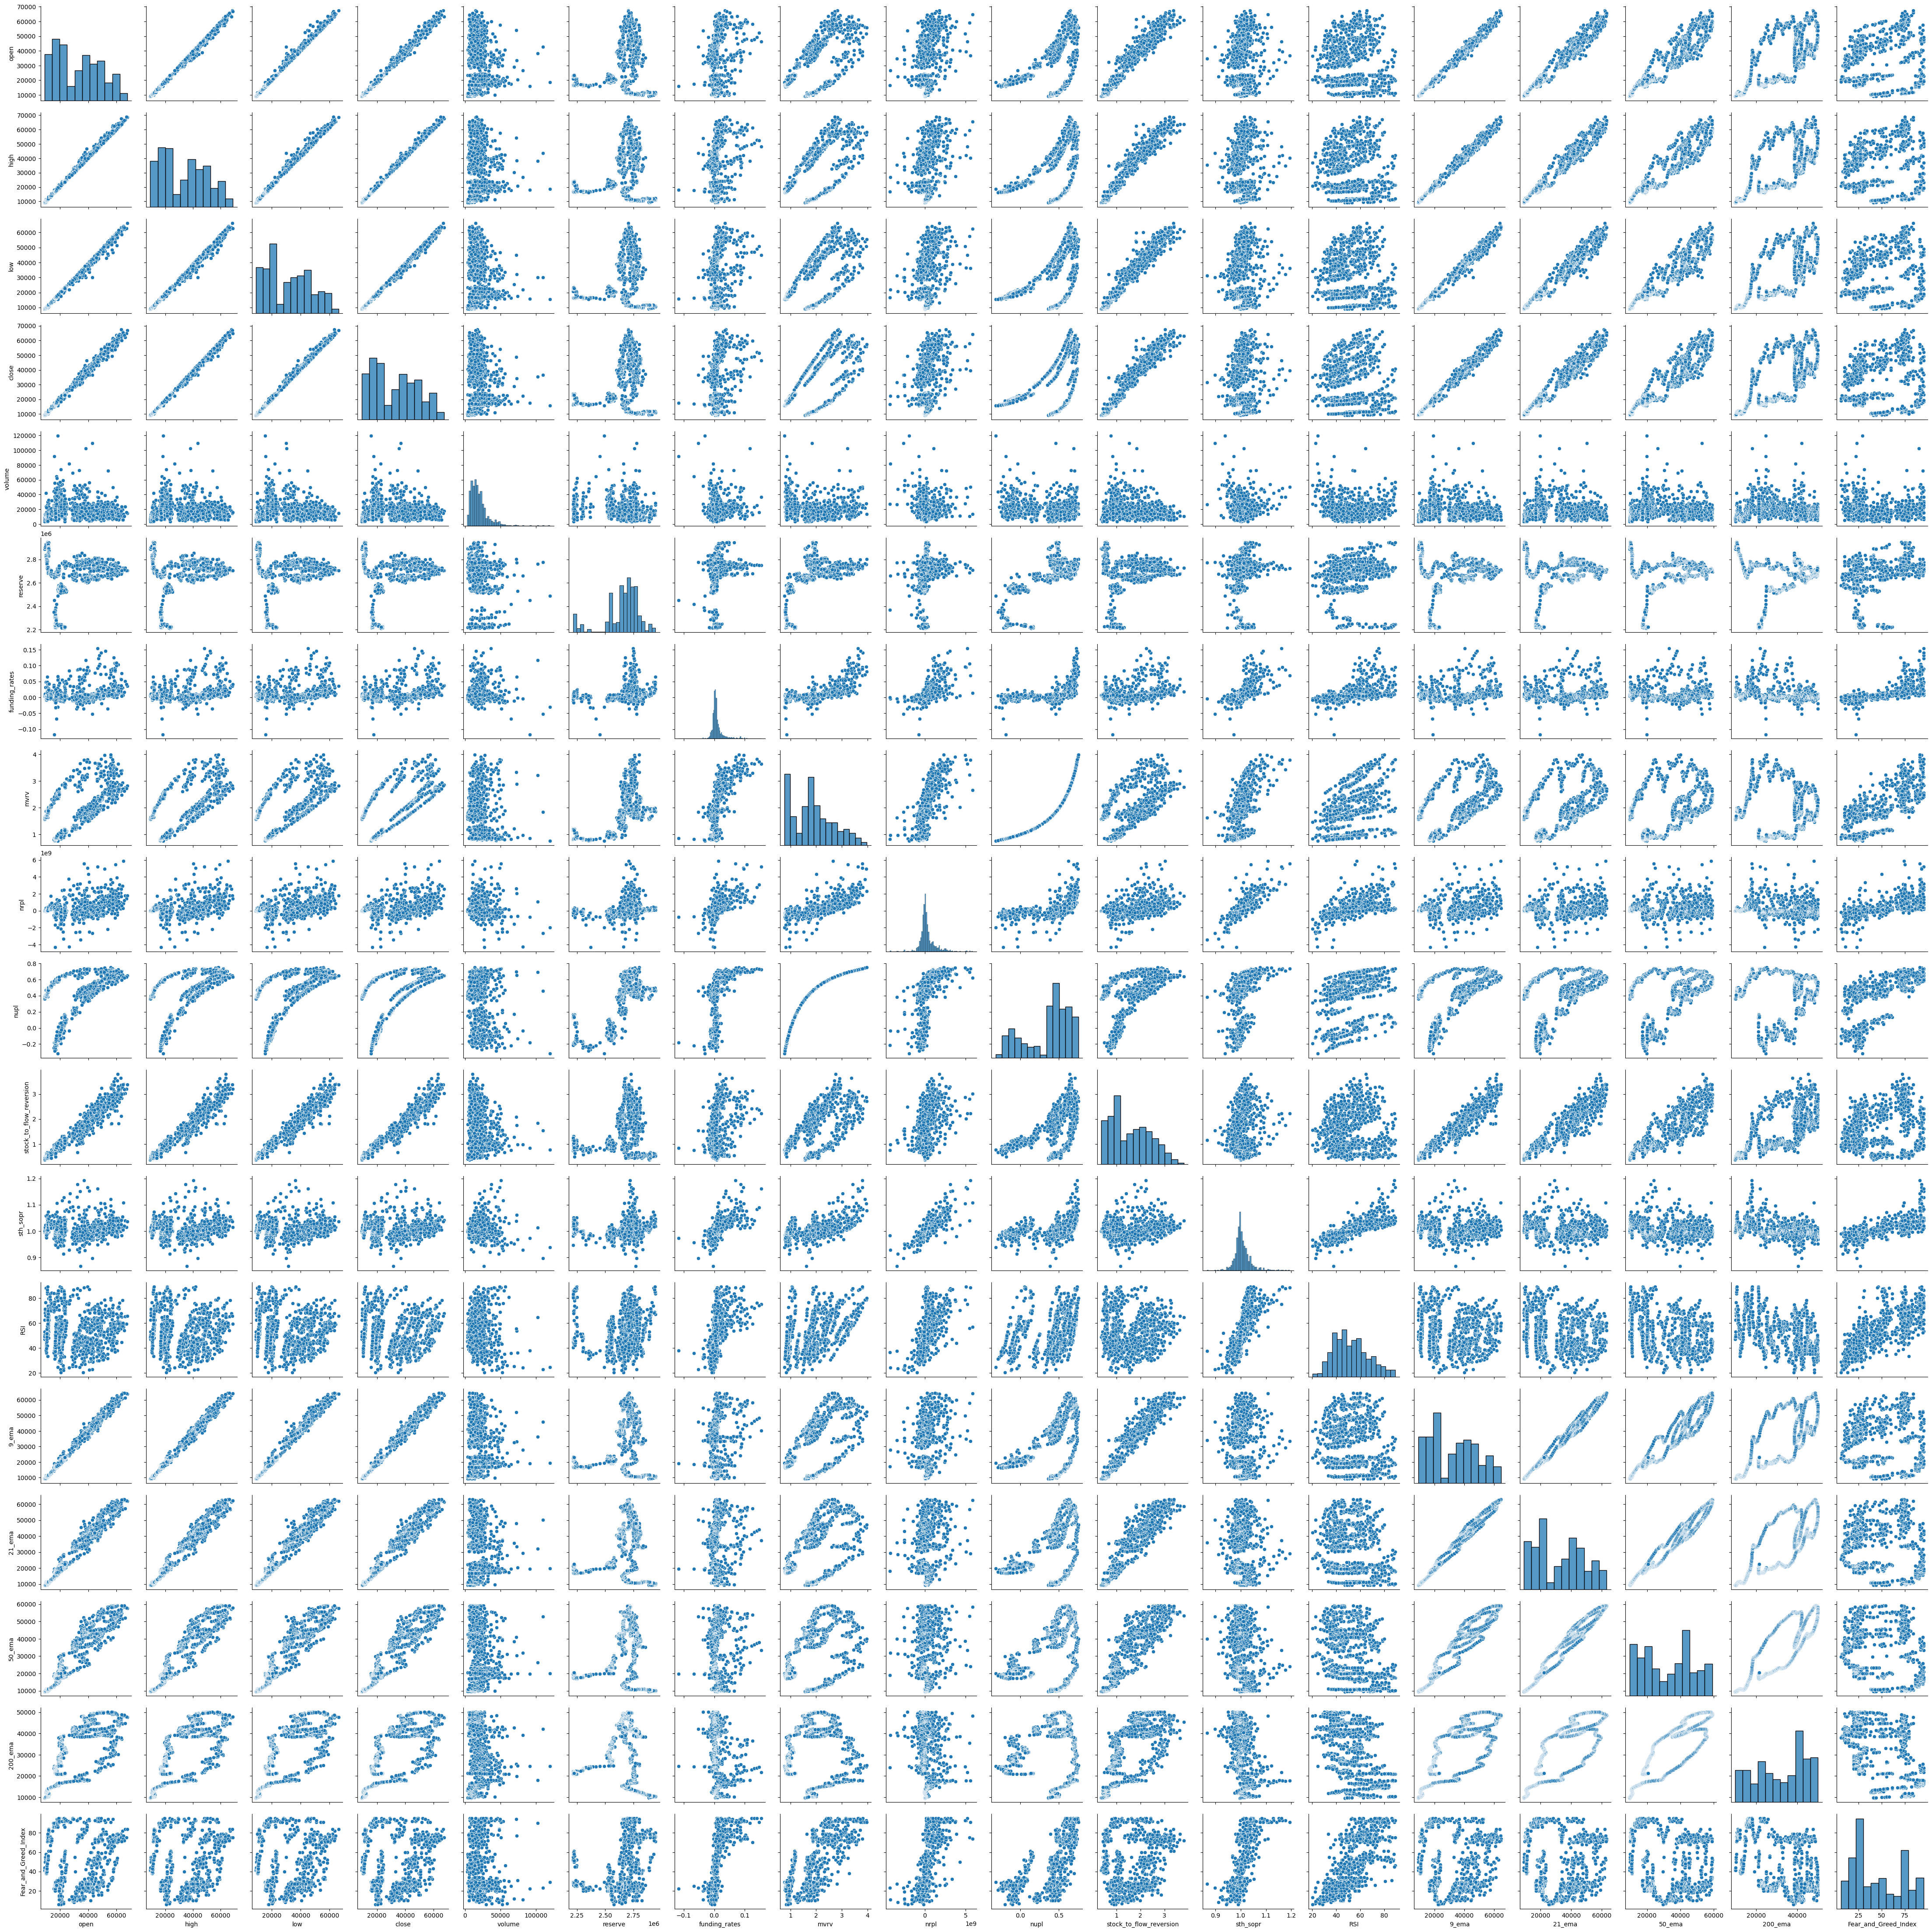

In [6]:
# Pairplot to visualize relationships between variables
sns.pairplot(data)
plt.show()

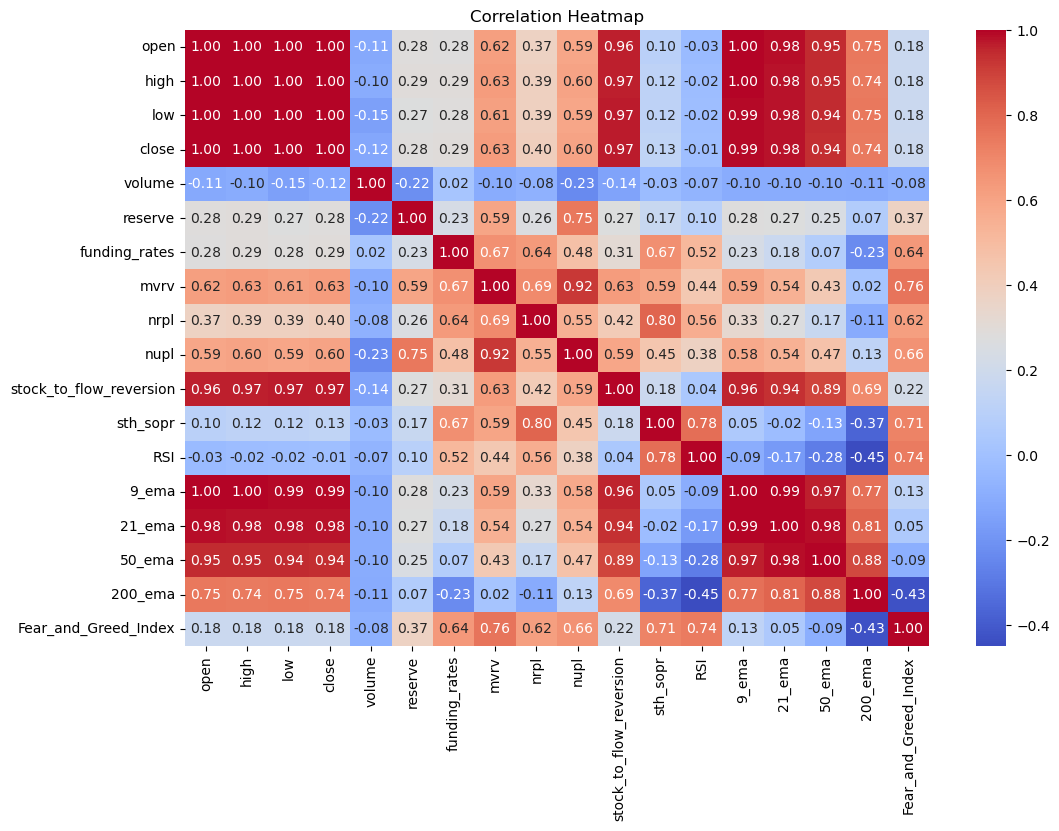

In [7]:
# Correlation heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [10]:
# Target Analysis
target_counts = data['signal'].value_counts()
print(target_counts)

none    771
sell     86
buy      78
Name: signal, dtype: int64


In [8]:
# Model Building
# Define features and target variable
X = data.drop(['datetime', 'signal'], axis=1)  # Excluding datetime and signal columns
y = data['signal']

In [14]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
# Make predictions
y_pred = rf_classifier.predict(X_test)


In [15]:
# Evaluation
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         buy       1.00      0.05      0.10        20
        none       0.80      0.99      0.89       148
        sell       0.67      0.11      0.18        19

    accuracy                           0.80       187
   macro avg       0.82      0.38      0.39       187
weighted avg       0.81      0.80      0.73       187



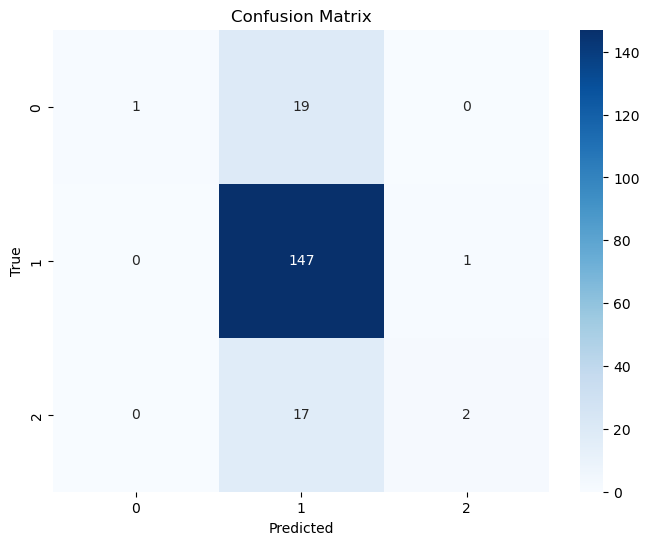

In [16]:
# Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset
data = pd.read_csv('data.csv')

# Summary Statistics
summary_stats = data.describe()
print("Summary Statistics:")
print(summary_stats)

# Univariate Analysis
def univariate_analysis(data):
    for column in data.columns:
        if data[column].dtype == 'object':
            # For categorical features
            print("\nUnivariate Analysis for", column)
            print(data[column].value_counts(normalize=True))
            print("=============================================")
        else:
            # For numerical features
            plt.figure(figsize=(10, 6))
            plt.subplot(2, 2, 1)
            sns.histplot(data[column], kde=True)
            plt.title('Histogram of ' + column)

            plt.subplot(2, 2, 2)
            sns.boxplot(data[column])
            plt.title('Boxplot of ' + column)

            plt.subplot(2, 2, 3)
            sns.violinplot(data[column])
            plt.title('Violinplot of ' + column)

            plt.subplot(2, 2, 4)
            sns.kdeplot(data[column], cumulative=True)
            plt.title('Cumulative Density Plot of ' + column)

            plt.tight_layout()
            plt.show()

univariate_analysis(data)

# Bivariate Analysis
def bivariate_analysis(data):
    for column1 in data.columns:
        for column2 in data.columns:
            if column1 != column2:
                if data[column1].dtype == 'object' and data[column2].dtype == 'object':
                    # For two categorical variables
                    contingency_table = pd.crosstab(data[column1], data[column2])
                    print("\nBivariate Analysis for", column1, "and", column2)
                    print(contingency_table)
                    print("=============================================")
                elif data[column1].dtype != 'object' and data[column2].dtype != 'object':
                    # For two numerical variables
                    plt.figure(figsize=(8, 6))
                    sns.scatterplot(data=data, x=column1, y=column2)
                    plt.title('Scatter plot between ' + column1 + ' and ' + column2)
                    plt.show()

bivariate_analysis(data)

# Multivariate Analysis
def multivariate_analysis(data):
    numerical_columns = data.select_dtypes(include=np.number).columns
    sns.pairplot(data[numerical_columns])
    plt.title('Pairplot of Numerical Variables')
    plt.show()

    correlation_matrix = data.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()

multivariate_analysis(data)

# Missing Values Analysis
missing_values = data.isnull().sum()
print("Missing Values Analysis:")
print(missing_values)

# Outlier Detection
def detect_outliers(data):
    numerical_columns = data.select_dtypes(include=np.number).columns
    for column in numerical_columns:
        z_scores = np.abs(stats.zscore(data[column]))
        outlier_threshold = 3
        outliers = data[(z_scores > outlier_threshold)]
        print("Outliers in", column, ":", len(outliers))

detect_outliers(data)

# Feature Engineering
# Example: Create a new feature by calculating the price difference between high and low
data['price_difference'] = data['high'] - data['low']

# Time-Series Analysis (if applicable)
# Example: Plotting cryptocurrency prices over time
data['datetime'] = pd.to_datetime(data['datetime'])
data.set_index('datetime', inplace=True)
plt.figure(figsize=(12, 6))
plt.plot(data['close'])
plt.title('Cryptocurrency Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Dimensionality Reduction (if applicable)
# Example: Perform PCA to reduce dimensionality
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(data.select_dtypes(include=np.number))

# Data Visualization
# Example: Plot the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1])
plt.title('PCA Plot of Cryptocurrency Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


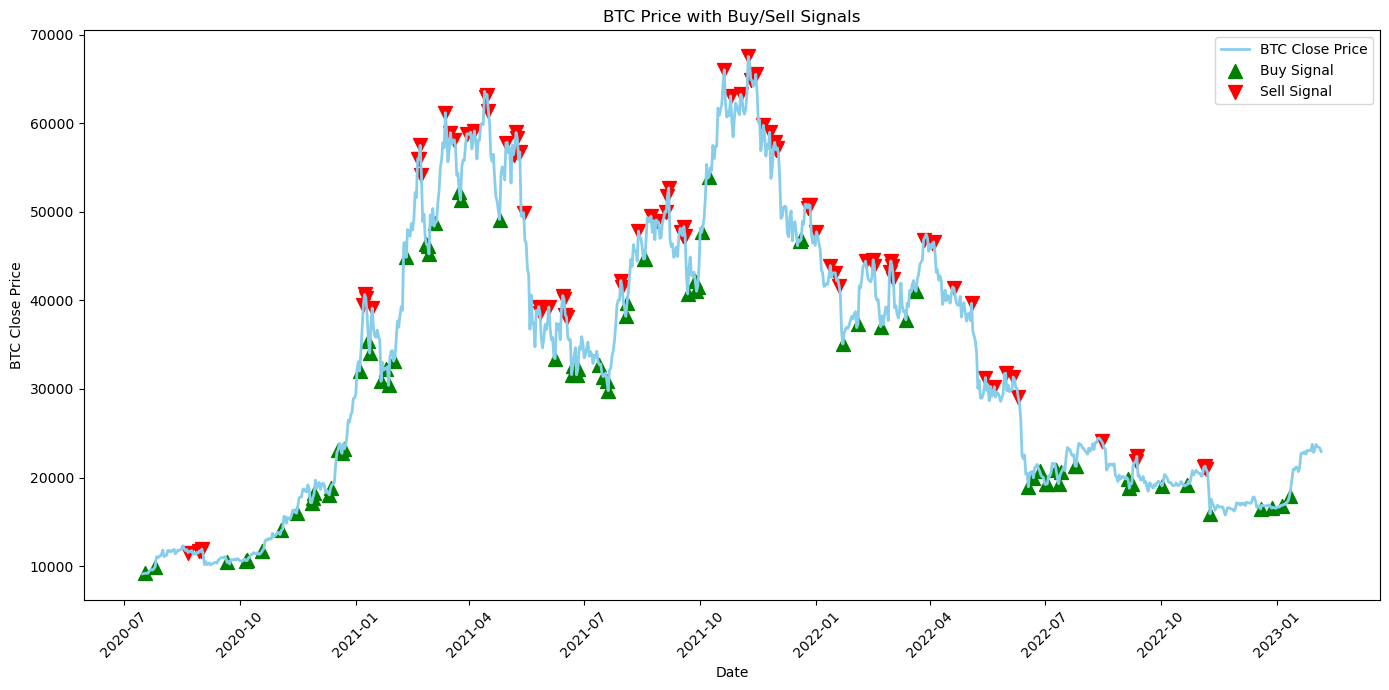

In [14]:
plt.figure(figsize=(14, 7))
plt.plot(data['datetime'], data['close'], label='BTC Close Price', color='skyblue', linewidth=2)
# Adjust the conditions to match the labels
# Highlight buy signals
buy_signals = data[data['signal'] == 'buy']
plt.scatter(buy_signals['datetime'], buy_signals['close'], label='Buy Signal', marker='^', color='green', alpha=1, s=100)

# Highlight sell signals
sell_signals = data[data['signal'] == 'sell']
plt.scatter(sell_signals['datetime'], sell_signals['close'], label='Sell Signal', marker='v', color='red', alpha=1, s=100)

plt.title('BTC Price with Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('BTC Close Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [15]:
# 7. Splitting the dataset
X = data.drop(['signal', 'datetime'], axis=1)  # Exclude 'datetime' for model training
y = data['signal'].map({'buy': 0, 'sell': 1, 'none': 2}).astype(int)  # Encoding signals

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# 8. Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

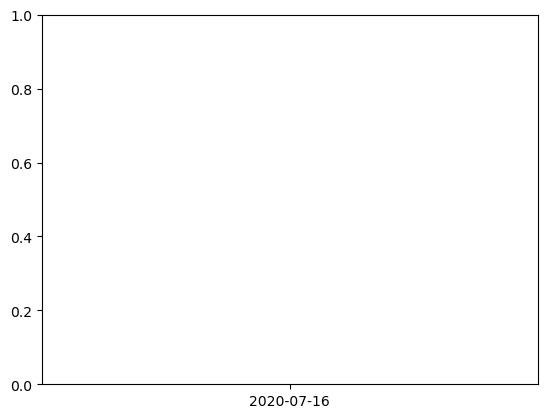

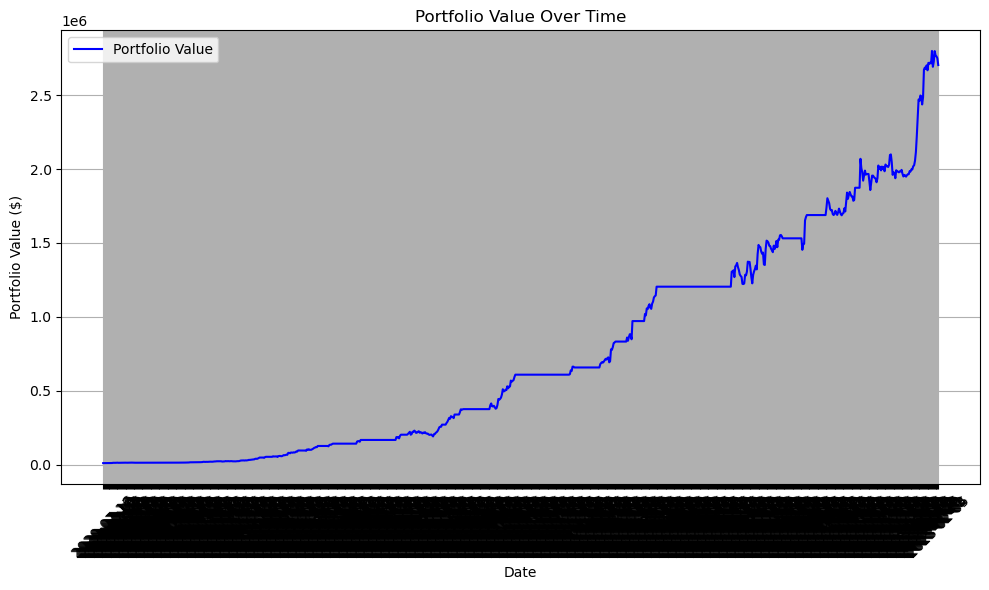

Total returns: 26941.80%


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("data.csv")

# Define the trading strategy function
def backtest_trading_strategy(data):
    # Simulate initial portfolio
    initial_cash = 10000
    cash = initial_cash
    crypto_holdings = 0
    portfolio_value = []

    # Loop through each row in the dataset
    for index, row in data.iterrows():
        signal = row['signal']
        close_price = row['close']

        # Buy signal
        if signal == 'buy':
            if cash > 0:
                crypto_holdings += cash / close_price
                cash = 0
        # Sell signal
        elif signal == 'sell':
            if crypto_holdings > 0:
                cash += crypto_holdings * close_price
                crypto_holdings = 0

        # Calculate portfolio value
        total_value = cash + (crypto_holdings * close_price)
        portfolio_value.append(total_value)

    # Calculate returns
    returns = (portfolio_value[-1] - initial_cash) / initial_cash * 100

    return portfolio_value, returns

# Perform backtesting
portfolio_value, returns = backtest_trading_strategy(data)

# Plot portfolio value over time
plt.figure(figsize=(10, 6))
plt.plot(data['datetime'], portfolio_value, label='Portfolio Value', color='blue')
plt.title('Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the returns
print(f"Total returns: {returns:.2f}%")
